In [51]:
import pandas as pd
df = pd.read_csv('C:/Users/quiet/Agricultural_Livestock_Price_In_Seoul/생필품 농수축산물 가격 정보(2013~2020).csv', encoding='euc-kr', low_memory=False)

In [52]:
import re
regex = "\(.*\)|\s-\s.*"
arr=[]
for i in range(len(df)):
    arr.append(re.sub(regex, '', str(df['품목 이름'][i])))
df['tmp']=arr
df=df.drop(['품목 이름'], axis=1)
df.rename(columns = {'tmp' : '품목 이름'}, inplace = True)

In [53]:
pd.options.display.float_format = '{:.5f}'.format

In [54]:
df.shape

(348414, 14)

In [55]:
df.head(3)

,일련번호,시장/마트 번호,시장/마트 이름,품목 번호,실판매규격,가격(원),년도-월,비고,시장유형 구분(시장/마트) 코드,시장유형 구분(시장/마트) 이름,자치구 코드,자치구 이름,점검일자,품목 이름
0,402321,25,방학동도깨비시장,305,1개,1250,13-Jan,경북4개 5.000원,1,전통시장,320000,도봉구,2013-01-31,사과
1,402322,25,방학동도깨비시장,306,1개,3000,13-Jan,나주,1,전통시장,320000,도봉구,2013-01-31,배
2,402323,25,방학동도깨비시장,307,1포기(3.3kg),4333,13-Jan,"전라도, 3포기 13,000원",1,전통시장,320000,도봉구,2013-01-31,배추


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348414 entries, 0 to 348413
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   일련번호               348414 non-null  int64 
 1   시장/마트 번호           348414 non-null  int64 
 2   시장/마트 이름           348414 non-null  object
 3   품목 번호              348414 non-null  int64 
 4   실판매규격              348414 non-null  object
 5   가격(원)              348414 non-null  int64 
 6   년도-월               348414 non-null  object
 7   비고                 261337 non-null  object
 8   시장유형 구분(시장/마트) 코드  348414 non-null  int64 
 9   시장유형 구분(시장/마트) 이름  348414 non-null  object
 10  자치구 코드             348414 non-null  int64 
 11  자치구 이름             348414 non-null  object
 12  점검일자               348414 non-null  object
 13  품목 이름              348414 non-null  object
dtypes: int64(6), object(8)
memory usage: 37.2+ MB


In [57]:
df.describe()

,일련번호,시장/마트 번호,품목 번호,가격(원),시장유형 구분(시장/마트) 코드,자치구 코드
count,348414.00000,348414.00000,348414.00000,348414.00000,348414.00000,348414.00000
mean,1294435.27571,102.16085,216.99896,5637.39141,1.50908,416305.51585
std,346316.49823,67.74418,105.90286,94114.07026,0.49992,185439.36549
min,402321.00000,1.00000,13.00000,0.00000,1.00000,110000.00000
25%,1103950.25000,44.00000,134.00000,1790.00000,1.00000,260000.00000
50%,1449205.50000,92.00000,266.00000,3000.00000,2.00000,410000.00000
75%,1541099.75000,146.00000,307.00000,5350.00000,2.00000,560000.00000
max,1673196.00000,228.00000,323.00000,35002980.00000,2.00000,740000.00000


In [58]:
df.isnull().sum()

일련번호                     0
시장/마트 번호                 0
시장/마트 이름                 0
품목 번호                    0
실판매규격                    0
가격(원)                    0
년도-월                     0
비고                   87077
시장유형 구분(시장/마트) 코드        0
시장유형 구분(시장/마트) 이름        0
자치구 코드                   0
자치구 이름                   0
점검일자                     0
품목 이름                    0
dtype: int64

In [59]:
df.drop(348060,inplace=True)

In [60]:
tmp=df[
(df['품목 번호'] == 18) |
(df['품목 번호'] == 171) |
(df['품목 번호'] == 278) |
(df['품목 번호'] == 285)
]
tmp[['품목 번호', '품목 이름']].drop_duplicates(keep='first')

,품목 번호,품목 이름
58,18,닭고기
315,171,달걀
1178,18,달걀
1432,278,쇠고기
37169,285,돼지고기
348061,18,돼지고기
348077,285,쇠고기
348079,171,돼지고기


In [61]:
df[['품목 번호', '품목 이름']].drop_duplicates(keep='first').sort_values('품목 번호')

,품목 번호,품목 이름
348067,13,동태
4285,13,고등어
267,17,달걀
348061,18,돼지고기
58,18,닭고기
...,...,...
348063,320,닭고기
76555,320,달걀
107285,320,조기
77371,321,달걀


In [62]:
tmp=df[
(df['품목 번호'] == 18) &
(df['품목 이름'] == '돼지고기')
]
tmp

,일련번호,시장/마트 번호,시장/마트 이름,품목 번호,실판매규격,가격(원),년도-월,비고,시장유형 구분(시장/마트) 코드,시장유형 구분(시장/마트) 이름,자치구 코드,자치구 이름,점검일자,품목 이름
348061,1669951,214,이마트 목동점,18,1kg,4980,20-Dec,"국내산,하림",2,대형마트,470000,양천구,2020-12-21,돼지고기
348078,1670032,223,홈플러스 목동점,18,1kg,6495,20-Nov,"국내산,하림",2,대형마트,470000,양천구,2020-11-30,돼지고기
348220,1672782,223,홈플러스 목동점,18,1마리(1kg),4995,20-Sep,"국내산, 하림",2,대형마트,470000,양천구,2020-09-28,돼지고기
348237,1672799,214,이마트 목동점,18,1마리(1kg),4980,20-Sep,"국내산, 마니커",2,대형마트,470000,양천구,2020-09-28,돼지고기
348254,1672816,103,신영시장,18,1마리(1kg),6000,20-Sep,"국내산, 하림",1,전통시장,470000,양천구,2020-09-28,돼지고기
348271,1672833,102,목3동시장,18,1마리(1.2kg),6500,20-Sep,"국내산, 하림",1,전통시장,470000,양천구,2020-09-28,돼지고기


In [63]:
subset=df[['시장유형 구분(시장/마트) 코드','시장유형 구분(시장/마트) 이름']]
subset.describe()
# 시장유형 구분(코드 1 : 전통시장, 코드 2 : 대형마트)

,시장유형 구분(시장/마트) 코드
count,348413.00000
mean,1.50908
std,0.49992
min,1.00000
25%,1.00000
50%,2.00000
75%,2.00000
max,2.00000


In [64]:
# 중복, 잘못 표기되어 있는 데이터 전처리 (품목코드와 품목이름이 다른 데이터)

In [65]:
pd.set_option('display.max_rows', 100)

In [66]:
counts=df.groupby('품목 번호')['품목 이름'].value_counts()
counts=counts.reset_index(name='count')
counts=counts[counts['count']<100]

In [67]:
subset = counts[['품목 번호', '품목 이름']]
tuples = [tuple(x) for x in subset.to_numpy()]
tuples

[(13, '동태'),
 (18, '돼지고기'),
 (18, '달걀'),
 (54, '오징어'),
 (58, '돼지고기'),
 (99, '닭고기'),
 (129, '쇠고기'),
 (134, '조기'),
 (152, '오징어'),
 (152, '조기'),
 (171, '돼지고기'),
 (176, '달걀'),
 (184, '명태'),
 (184, '오징어'),
 (201, '쇠고기'),
 (249, '갈치'),
 (250, '갈치'),
 (251, '갈치'),
 (253, '조기'),
 (254, '고등어'),
 (254, '명태'),
 (256, '고등어'),
 (259, '명태'),
 (260, '명태'),
 (262, '명태'),
 (263, '명태'),
 (266, '닭고기'),
 (266, '오징어'),
 (268, '무'),
 (273, '오이'),
 (277, '쇠고기'),
 (283, '달걀'),
 (285, '쇠고기'),
 (288, '달걀'),
 (292, '참기름'),
 (303, '달걀'),
 (308, '양파'),
 (309, '상추'),
 (310, '오이'),
 (311, '호박'),
 (313, '냉동참조기'),
 (320, '닭고기'),
 (320, '조기'),
 (321, '달걀'),
 (323, '달걀')]

In [68]:
idx=[]
for row in df[['품목 번호', '품목 이름']].itertuples():
    if (row[1],row[2]) in tuples:
            idx.append(row[0])
sorted(idx)

[728,
 1085,
 1178,
 1179,
 1180,
 1181,
 1182,
 1183,
 1400,
 2232,
 2669,
 2765,
 2872,
 3198,
 3756,
 3766,
 3958,
 4748,
 5110,
 5254,
 5420,
 5483,
 5700,
 6402,
 6554,
 6963,
 7145,
 7498,
 7656,
 7666,
 8080,
 8344,
 8594,
 8754,
 8852,
 9062,
 9414,
 9598,
 10288,
 10797,
 11209,
 11819,
 12806,
 13607,
 14449,
 14995,
 16380,
 16989,
 17407,
 17780,
 19245,
 21033,
 22679,
 24083,
 25034,
 25502,
 25540,
 26832,
 27288,
 28786,
 31180,
 31911,
 33446,
 33494,
 33568,
 33624,
 35713,
 35737,
 35753,
 35798,
 36071,
 36654,
 36759,
 38172,
 39012,
 39783,
 40860,
 41390,
 42827,
 43978,
 45165,
 45258,
 45276,
 46422,
 48050,
 49741,
 51800,
 52354,
 52370,
 52386,
 53678,
 53773,
 53805,
 53821,
 54188,
 54298,
 54363,
 54762,
 55190,
 55206,
 56326,
 56434,
 56450,
 56466,
 56803,
 56962,
 57566,
 57646,
 58014,
 58300,
 58807,
 58823,
 59081,
 59864,
 60196,
 60212,
 60565,
 61378,
 61694,
 61726,
 62192,
 63038,
 63402,
 63418,
 63834,
 64786,
 64802,
 65092,
 65296,
 65312,

In [69]:
df = df[~df.index.isin(idx)]

In [70]:
df[['품목 번호', '품목 이름']].drop_duplicates(keep='first').sort_values('품목 번호')

,품목 번호,품목 이름
4285,13,고등어
267,17,달걀
58,18,닭고기
38,22,오이
37,23,상추
36,24,양파
35,25,무
50,26,배추
49,27,배
48,28,사과


In [71]:
# 달걀 품목제거

In [72]:
df = df[~df['품목 이름'].str.contains("달걀", na=False, case=False)]

In [73]:
df['품목 이름'].unique()

array(['사과', '배', '배추', '무', '양파', '상추', '오이', '애호박', '쇠고기', '돼지고기',
       '닭고기', '조기', '명태', '오징어', '고등어', '호박', '삼겹살', '호박,중간', '냉동참조기',
       '배,신고', '사과, 부사', '동태'], dtype=object)

In [74]:
df=df.drop(['시장/마트 이름', '품목 번호', '일련번호', '시장/마트 번호', '년도-월', '시장유형 구분(시장/마트) 코드'], axis=1)

In [84]:
df=df[['실판매규격', '품목 이름', '가격(원)', '비고', '시장유형 구분(시장/마트) 이름', '자치구 코드', '자치구 이름', '점검일자']]

In [85]:
df.rename(columns = {'시장유형 구분(시장/마트) 이름' : '시장유형'}, inplace = True)

In [86]:
df

,실판매규격,품목 이름,가격(원),비고,시장유형,자치구 코드,자치구 이름,점검일자
0,1개,사과,1250,경북4개 5.000원,전통시장,320000,도봉구,2013-01-31
1,1개,배,3000,나주,전통시장,320000,도봉구,2013-01-31
2,1포기(3.3kg),배추,4333,"전라도, 3포기 13,000원",전통시장,320000,도봉구,2013-01-31
4,1망,양파,3000,무안,전통시장,320000,도봉구,2013-01-31
7,1개,애호박,2000,남양주,전통시장,320000,도봉구,2013-01-31
...,...,...,...,...,...,...,...,...
348407,1마리(1kg),닭고기,4995,"국내산,마니커",대형마트,470000,양천구,2020-12-21
348410,1마리,조기,3890,"수입산, 부세",대형마트,470000,양천구,2020-12-21
348411,1마리,동태,2998,수입산(러시아),대형마트,470000,양천구,2020-12-21
348412,1마리,오징어,6990,"국내산,생물",대형마트,470000,양천구,2020-12-21


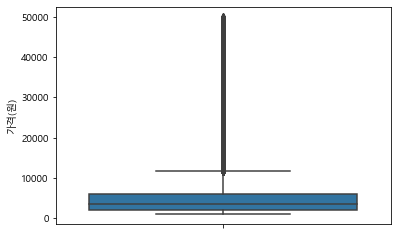

In [87]:
import warnings
warnings.filterwarnings(action='ignore')
import seaborn as sns
sns.boxplot(y = df['가격(원)'] );

In [77]:
df=df[df['가격(원)']<=50000]
df=df[df['가격(원)']>1000]

In [78]:
# 한글폰트 설정
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
fm.get_fontconfig_fonts()
font_location = 'C:/Windows/Fonts/malgunbd.ttf'
font_name = fm.FontProperties(fname=font_location).get_name()
plt.rc('font', family=font_name)
# 한글폰트 설정

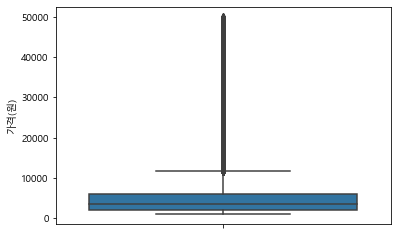

In [79]:
sns.boxplot(y = df['가격(원)'] );